In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [30]:
test_info = pd.read_csv("./test_info.csv")
test_info

,test,workersCount,locationsCount,sampleSize,defaultMean,hbTimeout,stdDevCount,geoFactor,crashProb,delta,...,learningRate,regParam,numIterations,messageLossProb,stdevMargin,stdevFactor,pattern,rand,averageDetectiontime,mistakeRate
0,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.000000e-10,0.3,10,0.01,3.0,100.0,True,False,52821.433333,0.138889
1,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.000000e-10,0.3,10,0.01,3.0,100.0,False,False,39835.934426,0.142778
2,mlfd_test,100,20,200,3000.0,2 seconds,30,50.0,0.001,nil,...,1.000000e-10,0.3,10,0.01,3.0,100.0,True,True,39625.216667,0.628889


## 

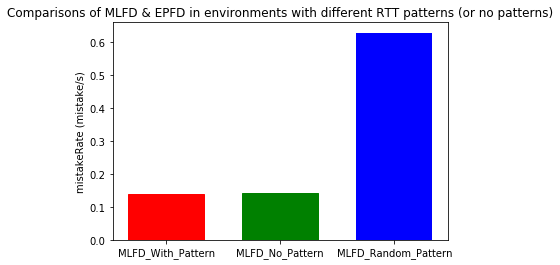

In [33]:
mlfdPattern = test_info.iloc[0]["mistakeRate"]
mlfdNoPattern = test_info.iloc[1]["mistakeRate"]
mlfdRandomPattern = test_info.iloc[2]["mistakeRate"]
data = [mlfdPattern, mlfdNoPattern, mlfdRandomPattern]
labels = ('MLFD_With_Pattern', 'MLFD_No_Pattern', "MLFD_Random_Pattern")
N = len(labels)
x = range(N)
width = 1/1.5
barlist = plt.bar(x, data, width, color="blue")
barlist[0].set_color('r')
barlist[1].set_color('g')
plt.xticks(np.arange(N), labels)
plt.ylabel('mistakeRate (mistake/s)')
plt.title('Comparisons of MLFD & EPFD in environments with different RTT patterns (or no patterns)')

(0, 10)

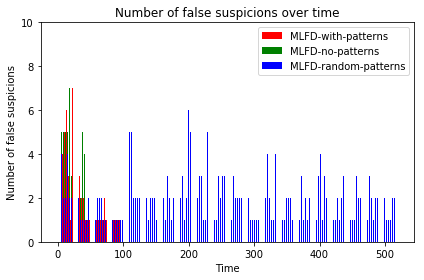

In [55]:
fs_mlfd_pattern = pd.read_csv('test5_pattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_no_pattern = pd.read_csv('test5_nopattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_random_pattern = pd.read_csv('test5_random_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
bar_width = 0.45
index1 = np.arange(len(fs_mlfd_pattern.values))
index2 = np.arange(len(fs_mlfd_no_pattern.values))
index3 = np.arange(len(fs_mlfd_random_pattern))
plt.bar(index1, fs_mlfd_pattern.values, width=width, color='r', error_kw=error_config, label='MLFD-with-patterns')
plt.bar(index2 + bar_width, fs_mlfd_no_pattern.values, width=width, color='g', error_kw=error_config, label='MLFD-no-patterns')
plt.bar(index3 + bar_width, fs_mlfd_random_pattern.values, width=width, color='b', error_kw=error_config, label='MLFD-random-patterns')
plt.xlabel('Time')
plt.ylabel('Number of false suspicions')
plt.title('Number of false suspicions over time')
plt.legend()
#lt.xticks(index1 + bar_width, ('MLFD', 'EPFD'))
plt.tight_layout()
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,10])